In [106]:
import pandas as pd
import numpy as np

# import models here 
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#setting up random seed for project requirements 
np.random.seed(73)


In [107]:
#reading in final dataset from EDA 
df = pd.read_csv('../data/stock_percentage_difference.csv')

In [108]:
df.columns

Index(['Unnamed: 0', 'level_0', 'transaction_date', 'ticker',
       'asset_description', 'type', 'amount', 'representative', 'timestamp',
       'merge_key', 'people', 'state', 'party_x', 'total_senate_years',
       'total_house_years', 'total_years', 'donation_merge_key', 'name',
       'total_raised', 'total_from_small_donors', 'percent_from_small_donors*',
       'total_money_raised', 'party_y', 'start', 'day_30',
       'day_30_stock_perc_diff', 'day_60', 'day_60_stock_perc_diff', 'day_90',
       'day_90_stock_perc_diff', 'day_180', 'day_180_stock_perc_diff',
       'sp_start', 'sp_30', 'sp_30_sp_perc_diff', 'sp_60',
       'sp_60_sp_perc_diff', 'sp_90', 'sp_90_sp_perc_diff', 'sp_180',
       'sp_180_sp_perc_diff'],
      dtype='object')

In [109]:
df['total_raised'] =[int(raised.replace('$','')) for raised in df['total_raised']]

In [110]:
df['percent_from_small_donors*'] = [float(pct.replace('%','')) for pct in df['percent_from_small_donors*']]

In [111]:
df['percent_from_small_donors*']

0         6.00
1         6.00
2         6.00
3         6.00
4         6.00
         ...  
10076    19.55
10077    19.55
10078    19.55
10079    19.55
10080    19.55
Name: percent_from_small_donors*, Length: 10081, dtype: float64

In [112]:
df['type'].value_counts()

purchase        5101
sale_full       2804
sale_partial    2088
exchange          88
Name: type, dtype: int64

In [113]:
beats_sp = []
for i, row in df.iterrows():
    if row['day_180_stock_perc_diff'] > row['sp_180_sp_perc_diff']:
        beats_sp.append(1)
    else:
        beats_sp.append(0)
df['beats_sp'] = beats_sp

In [114]:
df = df.loc[df['type'] == 'purchase']

In [115]:
df['beats_sp'].mean()

0.46324250147029994

In [116]:
df

,Unnamed: 0,level_0,transaction_date,ticker,asset_description,type,amount,representative,timestamp,merge_key,...,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff,beats_sp
1,1,1,2020-03-24,CNC,Centene Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585022400,Susie Lee,...,2447.330078,2797.800049,0.143,2955.449951,0.208,3083.760010,0.260,3319.469971,0.356,0
2,2,2,2020-03-31,DG,Dollar General Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585627200,Susie Lee,...,2584.590088,2912.429932,0.127,3055.729980,0.182,3130.010010,0.211,3298.459961,0.276,1
16,17,17,2020-07-02,HD,Home Depot,purchase,"$1,001 - $15,000",Robert J. Wittman,1593662400,"Robert Wittman, J.",...,3130.010010,3294.610107,0.053,3526.649902,0.127,3408.600098,0.089,3735.360107,0.193,0
17,18,18,2020-07-02,KMB,Kimberly-Clark Corp,purchase,"$1,001 - $15,000",Robert J. Wittman,1593662400,"Robert Wittman, J.",...,3130.010010,3294.610107,0.053,3526.649902,0.127,3408.600098,0.089,3735.360107,0.193,0
18,19,19,2020-07-02,RGLD,Royal Gold Inc,purchase,"$1,001 - $15,000",Robert J. Wittman,1593662400,"Robert Wittman, J.",...,3130.010010,3294.610107,0.053,3526.649902,0.127,3408.600098,0.089,3735.360107,0.193,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10072,10814,10814,2014-01-30,HON,Honeywell International Inc. (NYSE),purchase,"$1,001 - $15,000",Susan M Collins,1391058000,"Susan Collins, M.",...,1794.189941,1845.729980,0.029,1885.520020,0.051,1884.660034,0.050,1978.910034,0.103,0
10073,10815,10815,2014-01-30,CVS,CVS Caremark Corporation (NYSE),purchase,"$1,001 - $15,000",Susan M Collins,1391058000,"Susan Collins, M.",...,1794.189941,1845.729980,0.029,1885.520020,0.051,1884.660034,0.050,1978.910034,0.103,1
10074,10816,10816,2014-01-29,MSFT,Microsoft Corporation (NASDAQ),purchase,"$1,001 - $15,000",Susan M Collins,1390971600,"Susan Collins, M.",...,1774.199951,1859.449951,0.048,1872.339966,0.055,1881.140015,0.060,1978.339966,0.115,1
10078,10820,10820,2014-01-24,FB,"Facebook, Inc. (NASDAQ)",purchase,"$1,001 - $15,000",Susan M Collins,1390539600,"Susan Collins, M.",...,1790.290039,1845.119995,0.031,1852.560059,0.035,1878.329956,0.049,1983.530029,0.108,1


In [117]:
Features = ['party_x', 'total_senate_years', 'total_house_years', 'total_raised', 'percent_from_small_donors*']
X = df[Features]
y = df['beats_sp']

X = pd.get_dummies(X, columns = ['party_x'], drop_first = True)

In [138]:
# train test splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [141]:
# Voting Regressor

# pick and choose here which combinations to try for best model 
vote = VotingClassifier([
    ('logreg', LogisticRegression()),
    
    ('rfc', RandomForestClassifier()),
    ('extatrees', ExtraTreesClassifier()),
    ('bag', BaggingClassifier()),
    
    ('gb', GradientBoostingClassifier()),
    ('ada', AdaBoostClassifier()),
], voting='soft')


grid_params = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.1, 1], 
    'logreg__solver': ['saga'],
#    'logreg__warm_start': [False, True],
    
    'rfc__n_estimators': [150, 100],
    'rfc__max_depth': [20, 10],

    'bag__n_estimators': [20, 10],
    'bag__max_samples': [1.0],

    'extatrees__n_estimators': [150, 100],
    'extatrees__min_samples_split': [2, 1],
    
    'gb__learning_rate': [1, .1],
    'gb__n_estimators': [100, 50],
#    'gb__base_estimator': ['DecisionTreeClassifier', 'RandomForestClassifier'],
    
    'ada__n_estimators': [10, 20],
    'ada__learning_rate': [.1, 1],
#    'ada__base_estimator': ['DecisionTreeClassifier', 'RandomForestClassifier']

}

In [151]:
vote = GridSearchCV(vote, grid_params, cv=5, n_jobs = -1)
vote.fit(X_train_sc, y_train)

ValueError: Invalid parameter ada for estimator GridSearchCV(cv=5,
             estimator=GridSearchCV(cv=5,
                                    estimator=VotingClassifier(estimators=[('logreg',
                                                                            LogisticRegression()),
                                                                           ('rfc',
                                                                            RandomForestClassifier()),
                                                                           ('extatrees',
                                                                            ExtraTreesClassifier()),
                                                                           ('bag',
                                                                            BaggingClassifier()),
                                                                           ('gb',
                                                                            GradientBoostingClassifier()),
                                                                           ('ada',
                                                                            AdaBoostClassifier())],
                                                               voting='soft'),
                                    n_jobs=-1,
                                    param_grid={'ada__learning_rate': [0.1, 1],
                                                'ad...
                         'ada__n_estimators': [10, 20],
                         'bag__max_samples': [1.0],
                         'bag__n_estimators': [20, 10],
                         'extatrees__min_samples_split': [2, 1],
                         'extatrees__n_estimators': [150, 100],
                         'gb__learning_rate': [1, 0.1],
                         'gb__n_estimators': [100, 50], 'logreg__C': [0.1, 1],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['saga'], 'rfc__max_depth': [20, 10],
                         'rfc__n_estimators': [150, 100]},
             scoring=['accuracy', 'precision']). Check the list of available parameters with `estimator.get_params().keys()`.

In [143]:
vote.best_score_

0.5597385620915032

In [144]:
vote.best_params_

{'ada__learning_rate': 1,
 'ada__n_estimators': 10,
 'bag__max_samples': 1.0,
 'bag__n_estimators': 20,
 'extatrees__min_samples_split': 2,
 'extatrees__n_estimators': 100,
 'gb__learning_rate': 1,
 'gb__n_estimators': 100,
 'logreg__C': 1,
 'logreg__penalty': 'l2',
 'logreg__solver': 'saga',
 'rfc__max_depth': 10,
 'rfc__n_estimators': 150}

In [145]:
#checking variance and bias

print('Training Score:', vote.score(X_train_sc, y_train))
print('Testing Score:', vote.score(X_test_sc, y_test))

Training Score: 0.5822222222222222
Testing Score: 0.5462382445141066


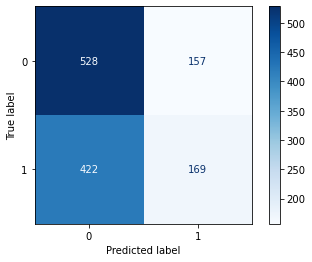

In [146]:
plot_confusion_matrix(vote, X_test_sc, y_test, cmap='Blues', 
                      values_format='d');

In [147]:
rf = RandomForestClassifier()
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    
}
grid = GridSearchCV(rf, params, n_jobs = -1)
grid.fit(X_train_sc, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 150]})

In [148]:
grid.best_score_

0.5584313725490195

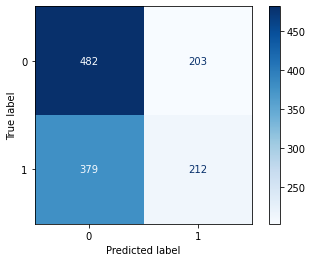

In [149]:
plot_confusion_matrix(grid, X_test_sc, y_test, cmap='Blues', 
                      values_format='d');

In [125]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

NameError: name 'preds' is not defined